In [3]:
from functools import partial
import jax.numpy as np
from jax import grad, jit, vmap

from dipole import VectorValuedKRR
from utils import matern, gaussian

In [ ]:
data = np.load('data/HOOH.DFT.PBE-TS.light.MD.500K.50k.R_E_F_D_Q.npz')
X = np.array(data['R'])
y = np.array(data['D'])

The following cells will visualise the hessian of the similarity for the first few data points. Being that we are dealing with a dataset of trajectories, data points with similar indices represent similar geometries.

In [75]:
import numpy as onp
from sklearn.model_selection import GridSearchCV


def search_hyperparams(size=50, **choices):
    fixed = {}
    for param, values in choices.items():
        if not isinstance(values, list):
            fixed[param] = values
            choices[param] = [values]
        else:
            search_param = param
     
    M = X.shape[0]

    indices = onp.random.choice(M, size=size, replace=False)
    Xtrain, ytrain = X[indices], y[indices]

    cross_validation = GridSearchCV(VectorValuedKRR(), choices)
    cross_validation.fit(Xtrain, ytrain)
    results = cross_validation.cv_results_
    mean_scores = -results['mean_test_score']
    return choices[search_param], mean_scores

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='lambda', ylabel='mean test score'>

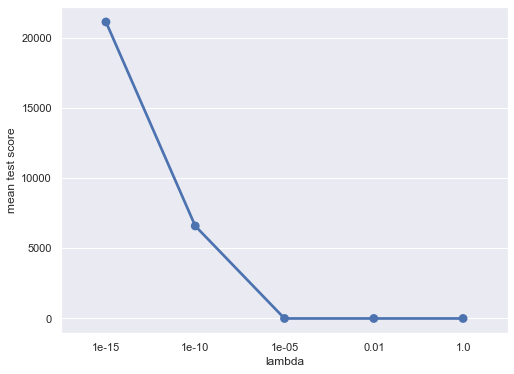

In [76]:
param_values_lambda, scores_lambda = search_hyperparams(lamb=[1e-15, 1e-10, 1e-5, 1e-2, 1.0], sigma=100)
data = pd.DataFrame({'lambda': param_values_lambda, 'mean test score': scores_lambda})
sns.pointplot(x='lambda', y='mean test score', data=data)

In [88]:
scores_lambda

array([2.11447762e+04, 6.59759784e+03, 1.24975112e-01, 1.24990930e-01,
       1.24990965e-01])

<AxesSubplot:xlabel='sigma', ylabel='mean test score'>

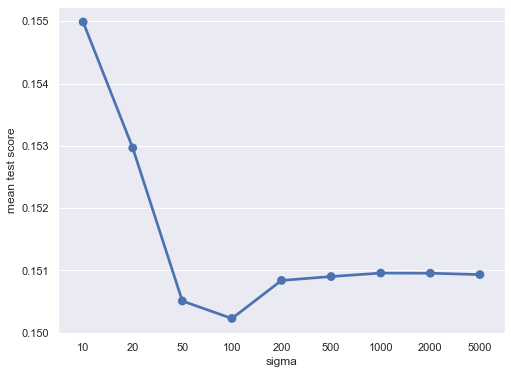

In [89]:
param_values_sigma, scores_sigma = search_hyperparams(lamb=1e-5, sigma=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
data = pd.DataFrame({'sigma': param_values_sigma, 'mean test score': scores_sigma})
sns.pointplot(x='sigma', y='mean test score', data=data)

In [90]:
scores_sigma

array([0.15499019, 0.15296831, 0.15051026, 0.15022951, 0.15084054,
       0.15090252, 0.15095864, 0.15095631, 0.15093392])

<AxesSubplot:xlabel='sigma', ylabel='mean test score'>

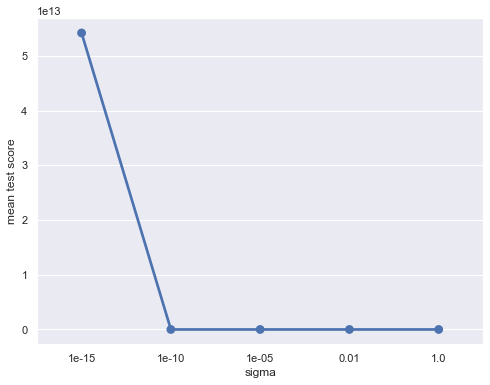

In [80]:
param_values_lambda_gauss, scores_lambda_gauss = search_hyperparams(lamb=[1e-15, 1e-10, 1e-5, 1e-2, 1.0], sigma=200, similarity=gaussian)
data = pd.DataFrame({'sigma': param_values_lambda_gauss, 'mean test score': scores_lambda_gauss})
sns.pointplot(x='sigma', y='mean test score', data=data)

In [83]:
scores_lambda_gauss

array([5.41738234e+13, 3.73475293e+04, 1.56291698e-01, 1.56393957e-01,
       1.56394061e-01])

<AxesSubplot:xlabel='sigma', ylabel='mean test score'>

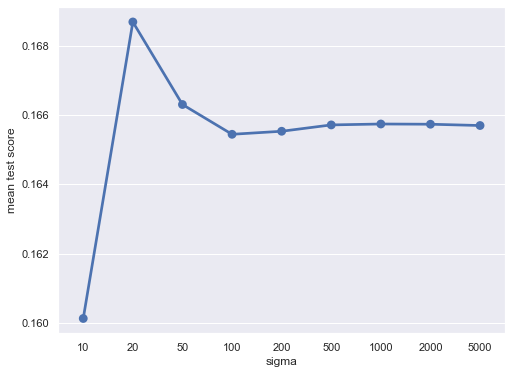

In [86]:
param_values_sigma_gauss, scores_sigma_gauss = search_hyperparams(lamb=1e-5, sigma=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000], similarity=gaussian)
data = pd.DataFrame({'sigma': param_values_sigma_gauss, 'mean test score': scores_sigma_gauss})
sns.pointplot(x='sigma', y='mean test score', data=data)

In [87]:
scores_sigma_gauss

array([0.16012809, 0.16868149, 0.16630048, 0.16544107, 0.16552861,
       0.16571148, 0.1657382 , 0.16573166, 0.16569427])